# Plot SpecParam Results
Plot schematic of LFP spectral parameterization results (exponent, r-squared, and stimulus-evoked changes in these parameters) 

#### Imports

In [1]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import odml
import os

# custom
import sys
sys.path.append("../../code")
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import SESSIONS
from plots import plot_schematic

### Demo plotting function on arbitrary data

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


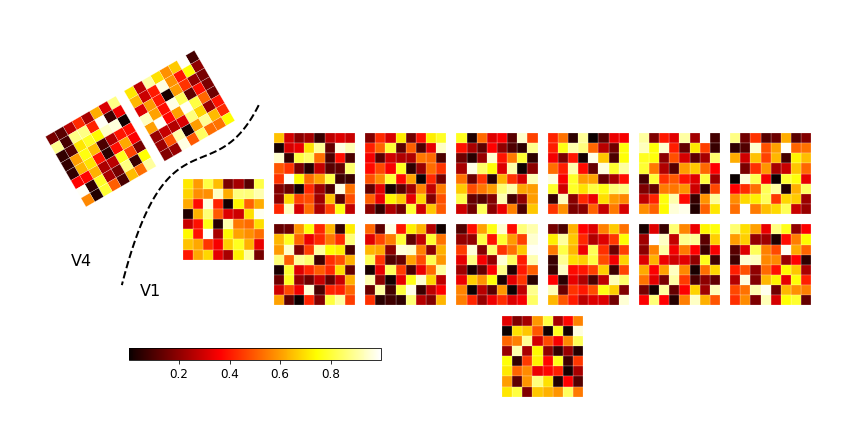

In [8]:
# define odml file path (contains metadata including electrode positions)
odml_path = f"{EXTERNAL_PATH}/V1_v4_1024_electrode_resting_state_data/data/{SESSIONS[0]}/metadata_{SESSIONS[0]}.odml"

# define arbitrary data
data = np.random.rand(1024)

# plot
plot_schematic(data, odml_path)

## Main

### Plot spectral parameters 

In [11]:
# load spectral parameters
df = pd.read_csv(f"{PROJECT_PATH}/data/results/spectral_params_diff.csv", index_col=0)
df

,session,channel,chan_idx,array,offset_post,knee_post,exponent_post,cf_0_post,pw_0_post,bw_0_post,...,cf_2_pre,pw_2_pre,bw_2_pre,cf_3_pre,pw_3_pre,bw_3_pre,error_pre,r_squared_pre,exp_diff,offset_diff
0,A_SNR_140819,0,0,1,9.902206,219236.320097,4.409639,20.726720,0.163174,5.880963,...,69.580402,0.226458,4.000000,NaN,NaN,NaN,0.031894,0.998489,0.749545,1.651895
1,A_SNR_140819,1,1,1,9.889650,297544.275369,4.448360,21.063765,0.148797,6.121192,...,69.608105,0.252213,4.000000,NaN,NaN,NaN,0.024117,0.998853,0.806767,1.766108
2,A_SNR_140819,2,2,1,9.352365,88240.771646,4.079099,21.059435,0.175926,7.332488,...,83.034727,0.265393,20.000000,NaN,NaN,NaN,0.051569,0.994847,0.982835,1.916470
3,A_SNR_140819,3,3,1,10.121877,599948.826238,4.603642,21.494445,0.115735,5.541040,...,69.419959,0.268177,4.000000,NaN,NaN,NaN,0.021202,0.998999,1.000396,2.079523
4,A_SNR_140819,4,4,1,9.622888,177268.692421,4.313483,21.790384,0.177751,7.309231,...,69.388871,0.270873,4.000000,NaN,NaN,NaN,0.021975,0.998878,0.827649,1.737473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,A_SNR_041018,59,1019,16,8.218674,920.375636,2.957407,15.313949,0.346989,4.929321,...,68.905336,0.240327,4.000000,NaN,NaN,NaN,0.018723,0.999040,0.050731,0.443614
3068,A_SNR_041018,60,1020,16,7.957116,524.482942,2.840909,15.249014,0.339185,6.002365,...,69.008468,0.387037,4.000000,NaN,NaN,NaN,0.025606,0.998220,-0.242457,-0.096319
3069,A_SNR_041018,61,1021,16,7.514403,161.380709,2.477766,15.290988,0.332045,8.115322,...,62.780322,0.363981,13.097224,69.222112,0.402534,4.0,0.024850,0.997902,-0.137914,0.048504
3070,A_SNR_041018,62,1022,16,7.782704,394.067650,2.638067,18.368436,0.290650,11.271569,...,68.951066,0.352868,4.000000,NaN,NaN,NaN,0.026839,0.997722,-0.027834,0.256783


In [24]:
# create function that calls plot_Schematic for each session

# loop through sessions
for i_session, session in enumerate(SESSIONS):
    # display progress
    print(f"    plotting session ({i_session+1}/{len(sessions)}): {session}")

    # create directory for figure output
    dir_figs = f"{PROJECT_PATH}/figures/params_schematic/{session}"
    if not os.path.exists(dir_figs):
        os.makedirs(dir_figs)

    # get data for session
    df_session = df[df['session']==session]

    # define odml file path (contains metadata including electrode positions)
    odml_path = f"{EXTERNAL_PATH}/V1_v4_1024_electrode_resting_state_data/data/{session}/metadata_{session}.odml"

    # look through features
    for var in ['offset', 'knee', 'exponent', 'r_squared']:
        # setting limits for colorbar
        all_values = np.append(df_session[f"{var}_pre"], df_session[f"{var}_post"])
        maxli = np.nanmax(all_values)
        minli = np.nanmin(all_values)

        # pre-stimulus
        plot_schematic(df_session[f"{var}_pre"], odml_path, title=f"session: {session}", 
                        label=f"pre-stimulus {var}", vmin=minli, vmax=maxli, 
                        fname_out=f"{dir_figs}/{session}_{var}_pre.png");

        # post-stimulus
        plot_schematic(df_session[f"{var}_post"], odml_path, title=f"session: {session}", 
                        label=f"post-stimulus {var}", vmin=minli, vmax=maxli, 
                        fname_out=f"{dir_figs}/{session}_{var}_post.png");

        # change in exponent
        diff = df_session[f"{var}_post"] - df_session[f"{var}_pre"]
        plot_schematic(diff, odml_path, norm_type="centered", title=f"session: {session}", 
                        label=f"difference in {var}", vmin=np.nanmin(diff), vmax=np.nanmax(diff), 
                        fname_out=f"{dir_figs}/{session}_{var}_diff.png");

        plt.close('all')

    plotting session (1/3): A_SNR_140819


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element 

    plotting session (2/3): L_SNR_250717


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document secti

    plotting session (3/3): A_SNR_041018


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document secti